In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/gdrive', force_remount=True)
filepath = '/content/gdrive/MyDrive' + '/Colab Notebooks/csv/Titanic/'

df_train = pd.read_csv(filepath + 'train.csv')
df_test = pd.read_csv(filepath + 'test.csv')

print(df_train.shape)
print(df_test.shape)

Mounted at /content/gdrive
(891, 12)
(418, 11)


In [2]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
print("-Traing Data-")
print(df_train.info()) # 훈련 데이터의 정보확인
print(df_train.isnull().sum()) # Age, Cabin, Embarked에 Data 결손확인

print("\n-Test Data-")
print(df_test.info()) # 검정 데이터의 정보확인
print(df_test.isnull().sum()) # Age, Fare, Cabin에 Data 결손확인

-Traing Data-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked        

In [7]:
f_nums = 9 # 설명변수의 개수 지정
x_train = np.zeros([len(df_train), f_nums])
y_train = df_train["Survived"]

x_test = np.zeros([len(df_test), f_nums])

print(x_train.shape, y_train.shape)
print(x_test.shape)

(891, 9) (891,)
(418, 9)


In [8]:
total_data = [df_train, df_test]

for dataset in total_data:
    dataset["Title"] = dataset["Name"].str.extract(r'([A-Za-z]+)\.', expand=False)

# "Name"에서 추출한 호칭 정보의 개수 확인
print(df_train["Title"].value_counts())
print(df_test["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [9]:
# 신분에 따른 분류
title_map = { "Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, 
            "Col": 3, "Ms": 1, "Mlle": 1, "Major": 3, "Lady": 3, "Capt": 3, "Sir": 3,
            "Don": 3, "Mme": 3, "Jonkheer": 3, "Countess": 3, "Dona": 3 }

for i in total_data:
    i['Title'] = i['Title'].map(title_map)

In [10]:
# "Cabin"의 앞 자리 알파벳만 가져옴.
for i in total_data:
    i["Cabin"] = i["Cabin"].str[:1]

# "Pclass"에 따른 "Cabin"찾기
# 훈련, 검정 데이터에 모두 Data 결손이 없었음
# "Pclass"에 따른 "Cabin"이 충분한 연관성 가진다고 판단 (티켓 등급에 따른 객실?)
print("-Traing Data-")
print(df_train[df_train["Pclass"] == 1]["Cabin"].value_counts())
print(df_train[df_train["Pclass"] == 2]["Cabin"].value_counts())
print(df_train[df_train["Pclass"] == 3]["Cabin"].value_counts())

print("\n-Test Data-")
print(df_test[df_test["Pclass"] == 1]["Cabin"].value_counts())
print(df_test[df_test["Pclass"] == 2]["Cabin"].value_counts())
print(df_test[df_test["Pclass"] == 3]["Cabin"].value_counts())

-Traing Data-
C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64
F    8
D    4
E    4
Name: Cabin, dtype: int64
F    5
G    4
E    3
Name: Cabin, dtype: int64

-Test Data-
C    35
B    18
D    11
E     9
A     7
Name: Cabin, dtype: int64
F    5
D    2
Name: Cabin, dtype: int64
F    3
G    1
Name: Cabin, dtype: int64


In [11]:
for i in total_data:
    i["FamilySize"] = 1 + i["SibSp"] + i["Parch"]

for i in total_data:
    i["Solo"] = (i["FamilySize"] == 1)

# 훈련, 검정 데이터의 범위 및 중간값 화인
print(df_train["FamilySize"].min(), df_train["FamilySize"].max(), df_train["FamilySize"].median())
print(df_test["FamilySize"].min(), df_test["FamilySize"].max(), df_test["FamilySize"].median())

1 11 1.0
1 11 1.0


In [12]:
# PDF에 첨부된 그림을 보니, 모터 근처의 3등석 구매자들은 생존확률이 높았을 것
# 모터 근처이므로 가격이 저렴했을 가능성이 존재함.

# 훈련데이터의 "Fare" 중앙값, 평균값, 최소, 최대 확인
# "Pclass"와 "Fare"간에 관계가 있을거란 직관적 추측
print("-Traing Data-")
print(df_train.groupby("Pclass")["Fare"].min(), 
      df_train.groupby("Pclass")["Fare"].max(), 
      df_train.groupby("Pclass")["Fare"].median(),
      df_train.groupby("Pclass")["Fare"].mean())

# 검정데이터의 "Fare" 중앙값, 평균값, 최소, 최대 확인
print("\n-Test Data-")
print(df_test.groupby("Pclass")["Fare"].min(), 
      df_test.groupby("Pclass")["Fare"].max(), 
      df_test.groupby("Pclass")["Fare"].median(),
      df_test.groupby("Pclass")["Fare"].mean())

# 좌석을 무료로 받은 사람도 있나?
# 중앙값과 평균을 적절히 사용해서 운임범위를 지정?

-Traing Data-
Pclass
1    0.0
2    0.0
3    0.0
Name: Fare, dtype: float64 Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64 Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64 Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

-Test Data-
Pclass
1    0.0000
2    9.6875
3    3.1708
Name: Fare, dtype: float64 Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64 Pclass
1    60.0000
2    15.7500
3     7.8958
Name: Fare, dtype: float64 Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64


In [13]:
## SibSp, Parch 통합하여, 가족 구성원으로 만들기?
x_train[:, 0] = df_train["Sex"].map( { "male":0, "female":1 } ).astype('category').cat.codes
x_train[:, 1] = df_train["Pclass"].map( { 3: 0, 2: 1, 1: 2 } ).astype(float)

# x_train[:, 2] = (df_train["Fare"] - df_train["Fare"].mean()) / df_train["Fare"].std()
df_train.loc[df_train["Fare"] <= 17, "Fare"] = 0
df_train.loc[(df_train["Fare"] > 17) & (df_train["Fare"] <= 30), "Fare"] = 1
df_train.loc[(df_train["Fare"] > 30) & (df_train["Fare"] <= 100), "Fare"] = 2
df_train.loc[(df_train["Fare"] > 100), "Fare"] = 3
x_train[:, 2] = df_train["Fare"].astype(float)
x_train[:, 3] = df_train["Embarked"].fillna("S").map( { "S":0, "Q":1, "C":2 } ).astype('category').cat.codes

df_train["Age"].fillna(df_train.groupby("Title")["Age"].transform("median"), inplace=True)
#x_train[:, 4] = (df_train["Age"] - df_train["Age"].mean()) / df_train["Age"].std()
df_train.loc[df_train["Age"] <= 16, "Age"] = 0
df_train.loc[(df_train["Age"] > 16) & (df_train["Age"] <= 26), "Age"] = 1
df_train.loc[(df_train["Age"] > 26) & (df_train["Age"] <= 36), "Age"] = 2
df_train.loc[(df_train["Age"] > 36) & (df_train["Age"] <= 46), "Age"] = 3
df_train.loc[(df_train["Age"] > 46) & (df_train["Age"] <= 56), "Age"] = 4
df_train.loc[(df_train["Age"] > 56) & (df_train["Age"] <= 62), "Age"] = 5
df_train.loc[(df_train["Age"] > 62), "Age"] = 6
x_train[:, 4] = df_train["Age"].astype(float)
x_train[:, 5] = df_train["FamilySize"].map( { 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10 } ).astype(float)

df_train["Cabin"] = df_train["Cabin"].map( { "A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "T": 7 } ).astype(float)
df_train["Cabin"].fillna(df_train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
x_train[:, 6] = df_train["Cabin"].astype('category').cat.codes
x_train[:, 7] = df_train["Title"].astype('category').cat.codes
x_train[:, 8] = df_train["Solo"].astype('category').cat.codes

In [14]:
x_test[:, 0] = df_test["Sex"].map({"male": 0, "female": 1}).astype('category').cat.codes
x_test[:, 1] = df_test["Pclass"].map({3: 0, 2: 1, 1: 2}).astype(float)

df_test["Fare"].fillna(df_test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
# x_test[:, 2] = (df_test["Fare"] - df_test["Fare"].mean()) / df_test["Fare"].std()
df_test.loc[df_test["Fare"] <= 17, "Fare"] = 0
df_test.loc[(df_test["Fare"] > 17) & (df_test["Fare"] <= 30), "Fare"] = 1
df_test.loc[(df_test["Fare"] > 30) & (df_test["Fare"] <= 100), "Fare"] = 2
df_test.loc[(df_test["Fare"] > 100), "Fare"] = 3
x_test[:, 2] = df_test["Fare"].astype(float)
x_test[:, 3] = df_test["Embarked"].map({"S": 0, "Q": 1, "C": 2}).astype('category').cat.codes

df_test["Age"].fillna(df_test.groupby("Title")["Age"].transform("median"), inplace=True)
# x_test[:, 4] = (df_test["Age"] - df_test["Age"].mean()) / df_test["Age"].std()
df_test.loc[df_test["Age"] <= 16, "Age"] = 0
df_test.loc[(df_test["Age"] > 16) & (df_test["Age"] <= 26), "Age"] = 1
df_test.loc[(df_test["Age"] > 26) & (df_test["Age"] <= 36), "Age"] = 2
df_test.loc[(df_test["Age"] > 36) & (df_test["Age"] <= 46), "Age"] = 3
df_test.loc[(df_test["Age"] > 46) & (df_test["Age"] <= 56), "Age"] = 4
df_test.loc[(df_test["Age"] > 56) & (df_test["Age"] <= 62), "Age"] = 5
df_test.loc[(df_test["Age"] > 62), "Fare"] = 6
x_test[:, 4] = df_test["Age"].astype(float)
x_test[:, 5] = df_test["FamilySize"].map( { 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10 } ).astype(float)

df_test["Cabin"] = df_test["Cabin"].map( { "A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "T": 7 } ).astype(float)
df_test["Cabin"].fillna(df_test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
x_test[:, 6] = df_test["Cabin"].astype('category').cat.codes
x_test[:, 7] = df_test["Title"].astype('category').cat.codes
x_test[:, 8] = df_test["Solo"].astype('category').cat.codes

In [15]:
w = np.random.rand(f_nums)
b = np.random.rand()

print(w, b)

[0.78525654 0.53685819 0.99999475 0.16065695 0.56003378 0.17933101
 0.60768369 0.94430557 0.7584911 ] 0.09040578132304788


In [16]:
def sigmoid(x):
 return 1.0 / (1.0 + np.exp(-x))

def hypothesis(w, x, b):
 return sigmoid(x.dot(w) + b)
 
def cost_function(h, y):
 return -np.mean(y * np.log(h + 1e-8) + (1.0 - y) * np.log(1.0 - h + 1e-8))

In [17]:
alpha = 1e-2
epoch = 50000

total_loss = []
for i in range(epoch):
    h = hypothesis(w, x_train, b)
    loss = cost_function(h, y_train)

    for j in range(f_nums):
        w[j] = w[j] - alpha * np.mean((h - y_train) * x_train[:, j])
    b = b - alpha * np.mean(h - y_train)
    total_loss.append(loss)

total_loss = np.array(total_loss)

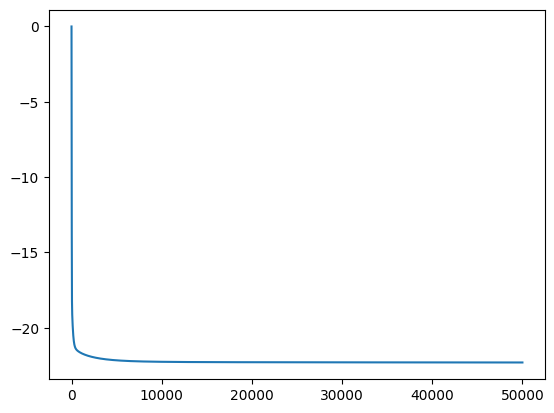

In [18]:
plt.plot(10.0 * np.log(total_loss / (np.max(total_loss + 1e-8))))
plt.show()

In [19]:
y_pred = hypothesis(w, x_test, b)
y_pred = np.round(y_pred)

print(y_pred.shape)

(418,)


In [20]:
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"].astype(int),
    "Survived": y_pred.astype(int)
})

submission.to_csv(filepath + "result.csv", index=False)